In [1]:
#Importation des modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Ouverture du fichier 

In [2]:
#Ouverture du fichier

usa =  pd.read_csv('usa2.csv', sep=',', encoding='ISO-8859-1')
usa = usa.drop(['Unnamed: 0'],axis=1)

#Renommage des colonnes
usa = usa.rename(columns = {'POP10':'population',
                             'WHITEp':'pop_blanche',
                             'BLACKp':'pop_noir',
                             'HISPAp':'pop_hispanique',
                             'ASIANp':'pop_asiatique',
                             'OTHERp' :'pop_autres',
                             'UNDER18p': 'm18ans',
                             'F18TO24p':'e18_24ans',
                             'F25TO44p':'e25_44ans',
                             'F45TO64p':'e45_64ans',
                             'MORE65p':'p65ans',
                             'NODIPLOMp':'nondiplomés',
                             'F9TO12THp' : 'lycée',
                             'UNDERGRADp':'bac',
                             'GRADUATEp':'université',
                             'F0TO20p':'m20d',
                             'F20TO40p':'e20_40d',
                             'F40TO60p':'e40_60d',
                             'F60TO80p' : 'e60_80d',
                             'F80TO100p' : 'p80d'})

usa.head(10)

,cbssa,name,state,NameState,PartUSA,Political,Candidat,BorderSea,Anglais_Off,population,...,p65ans,nondiplomés,lycée,bac,université,m20d,e20_40d,e40_60d,e60_80d,p80d
0,10100,Aberdeen,SD,South Dakota,North-West,Republicain,Trump,No,Yes,40602,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Aberdeen,WA,Washington,North-East,Republicain,Trump,Yes,No,72797,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Abilene,TX,Texas,South-West,Republicain,Trump,No,No,165252,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Ada,OK,Oklahoma,South-West,Republicain,Trump,No,No,37492,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Adrian,MI,Michigan,North-East,Republicain,Trump,No,No,99892,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17
5,10420,Akron,OH,Ohio,North-East,Democrate,Clinton,No,No,703200,...,14.19,2.40,41.01,28.23,28.35,19.44,20.94,18.41,22.62,18.58
6,10460,Alamogordo,NM,New Mexico,South-West,Republicain,Trump,No,No,63797,...,14.97,7.64,36.30,38.59,17.47,24.72,26.37,19.51,19.12,10.28
7,10500,Albany,GA,Georgia,South-East,Democrate,Clinton,No,Yes,157308,...,11.99,6.32,46.68,30.91,16.09,29.28,24.08,16.34,18.18,12.11
8,10540,Albany,OR,Oregon,North-West,Republicain,Trump,No,No,116672,...,15.42,3.31,40.64,39.90,16.15,19.64,22.61,21.00,24.04,12.70
9,10580,Albany-Schenectady-Troy,NY,New-York,North-East,Republicain,Trump,No,No,870716,...,14.04,2.74,34.33,29.35,33.57,14.89,17.97,16.49,24.91,25.74


# 2 - Regression linéaire multiple


In [3]:
usa2 = usa.drop(columns=["name", "state",'PartUSA',"NameState","Political","BorderSea","Anglais_Off"],axis=1)
usa2.head(5)

,cbssa,Candidat,population,pop_blanche,pop_noir,pop_asiatique,pop_autres,pop_hispanique,m18ans,e18_24ans,...,p65ans,nondiplomés,lycée,bac,université,m20d,e20_40d,e40_60d,e60_80d,p80d
0,10100,Trump,40602,93.03,0.47,0.88,4.25,1.36,23.27,10.21,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Trump,72797,81.43,1.05,1.37,7.54,8.62,21.60,8.59,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Trump,165252,68.22,6.99,1.28,2.27,21.25,23.67,13.02,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Trump,37492,69.28,2.34,0.65,23.67,4.06,23.36,13.10,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Trump,99892,87.58,2.40,0.49,1.91,7.62,23.15,9.48,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17


In [4]:
usa2.columns

Index(['cbssa', 'Candidat', 'population', 'pop_blanche', 'pop_noir',
       'pop_asiatique', 'pop_autres', 'pop_hispanique', 'm18ans', 'e18_24ans',
       'e25_44ans', 'e45_64ans', 'p65ans', 'nondiplomés', 'lycée', 'bac',
       'université', 'm20d', 'e20_40d', 'e40_60d', 'e60_80d', 'p80d'],
      dtype='object')

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [6]:


reg_log2 = smf.glm('Candidat~population+pop_blanche+pop_noir+pop_asiatique+pop_autres+pop_hispanique+m18ans+e18_24ans+e25_44ans+e45_64ans+p65ans+nondiplomés+lycée+bac+université+m20d+e20_40d+e40_60d+e60_80d+p80d',
                   data=usa2, family=sm.families.Binomial()).fit()


print(reg_log2.summary())

                            Generalized Linear Model Regression Results                             
Dep. Variable:     ['Candidat[Clinton]', 'Candidat[Trump]']   No. Observations:                  917
Model:                                                  GLM   Df Residuals:                      896
Model Family:                                      Binomial   Df Model:                           20
Link Function:                                        logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -377.77
Date:                                      Sat, 13 May 2023   Deviance:                       755.54
Time:                                              00:36:54   Pearson chi2:                     870.
No. Iterations:                                           7                                         
Covariance Type:                                  nonrobust                                

#### 2nd méthode : réduction des variables

In [7]:
usa2['minoritaire'] = usa2['pop_noir']+usa2['pop_hispanique']+usa2['pop_asiatique'] 

usa2['jeune'] = usa2['m18ans'] + usa2['e18_24ans']

usa2['senior'] = usa2['e45_64ans'] + usa2['p65ans']

usa2['diplomés'] = usa2.bac+usa2['université']

usa2['revenu_faible'] = usa2['m20d']+usa2['e20_40d']

usa2['revenu_eleve'] = usa2['e60_80d']+usa2['p80d']


In [8]:
usa2.columns

Index(['cbssa', 'Candidat', 'population', 'pop_blanche', 'pop_noir',
       'pop_asiatique', 'pop_autres', 'pop_hispanique', 'm18ans', 'e18_24ans',
       'e25_44ans', 'e45_64ans', 'p65ans', 'nondiplomés', 'lycée', 'bac',
       'université', 'm20d', 'e20_40d', 'e40_60d', 'e60_80d', 'p80d',
       'minoritaire', 'jeune', 'senior', 'diplomés', 'revenu_faible',
       'revenu_eleve'],
      dtype='object')

In [9]:
usa3 = usa2.drop(columns=["pop_noir", "pop_asiatique",'pop_autres', 'pop_hispanique','m18ans', 'e18_24ans',
       'e25_44ans', 'e45_64ans', 'p65ans','lycée', 'bac',
       'université', 'm20d', 'e20_40d', 'e40_60d', 'e60_80d', 'p80d'],axis=1)
usa3.head(5)

,cbssa,Candidat,population,pop_blanche,nondiplomés,minoritaire,jeune,senior,diplomés,revenu_faible,revenu_eleve
0,10100,Trump,40602,93.03,4.88,2.71,33.48,43.53,57.30,40.57,38.77
1,10140,Trump,72797,81.43,5.72,11.04,30.19,46.23,53.81,46.84,33.32
2,10180,Trump,165252,68.22,6.87,29.52,36.69,38.02,53.48,45.81,35.10
3,10220,Trump,37492,69.28,5.09,7.05,36.46,39.65,54.68,49.20,32.28
4,10300,Trump,99892,87.58,3.71,10.51,32.63,43.33,52.47,42.02,38.95


In [10]:
reg_log3 = smf.glm('Candidat~population+pop_blanche+nondiplomés+minoritaire+jeune+senior+diplomés+revenu_faible+revenu_eleve',
                   data=usa3, family=sm.families.Binomial()).fit()


print(reg_log3.summary())

                            Generalized Linear Model Regression Results                             
Dep. Variable:     ['Candidat[Clinton]', 'Candidat[Trump]']   No. Observations:                  917
Model:                                                  GLM   Df Residuals:                      907
Model Family:                                      Binomial   Df Model:                            9
Link Function:                                        logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -400.92
Date:                                      Sat, 13 May 2023   Deviance:                       801.85
Time:                                              00:36:54   Pearson chi2:                     954.
No. Iterations:                                           7                                         
Covariance Type:                                  nonrobust                                

On décide de fixer une significativité à 20% comme seuil on supprime 2 variables qui ne sont pas significatif : 
- jeune
- sénior 

In [11]:
usa3 = usa3.drop(columns=["jeune", "senior"],axis=1)

usa3 = usa3.replace('Trump',1)
usa3 = usa3.replace('Clinton',0)


usa3.head(5)

,cbssa,Candidat,population,pop_blanche,nondiplomés,minoritaire,diplomés,revenu_faible,revenu_eleve
0,10100,1,40602,93.03,4.88,2.71,57.30,40.57,38.77
1,10140,1,72797,81.43,5.72,11.04,53.81,46.84,33.32
2,10180,1,165252,68.22,6.87,29.52,53.48,45.81,35.10
3,10220,1,37492,69.28,5.09,7.05,54.68,49.20,32.28
4,10300,1,99892,87.58,3.71,10.51,52.47,42.02,38.95


In [12]:
#Dexindexer la colonne 
usa3 = usa3.set_index('cbssa')

usa3.head(5)

,Candidat,population,pop_blanche,nondiplomés,minoritaire,diplomés,revenu_faible,revenu_eleve
cbssa,,,,,,,,
10100,1,40602,93.03,4.88,2.71,57.30,40.57,38.77
10140,1,72797,81.43,5.72,11.04,53.81,46.84,33.32
10180,1,165252,68.22,6.87,29.52,53.48,45.81,35.10
10220,1,37492,69.28,5.09,7.05,54.68,49.20,32.28
10300,1,99892,87.58,3.71,10.51,52.47,42.02,38.95


# 3 - Réduction de l'information 

In [13]:
#On ne prend que les valeurs positifs

usa_pca = usa3[usa3.columns[1:]]

usa_pca.head()

,population,pop_blanche,nondiplomés,minoritaire,diplomés,revenu_faible,revenu_eleve
cbssa,,,,,,,
10100,40602,93.03,4.88,2.71,57.30,40.57,38.77
10140,72797,81.43,5.72,11.04,53.81,46.84,33.32
10180,165252,68.22,6.87,29.52,53.48,45.81,35.10
10220,37492,69.28,5.09,7.05,54.68,49.20,32.28
10300,99892,87.58,3.71,10.51,52.47,42.02,38.95


In [14]:
#on récupère tous les valeurs pour chaque ligne
X = usa_pca.values

#On récupère tous les individus qui sont en réalité les pays
names = usa_pca.index

# On récupère les colonnes dont on a besoin pour les utiliséq
features = usa_pca.columns

#On prend la valeurs qualitatifs
y = usa3[['Candidat']]

In [15]:
# Importation des modules ACP par Scikit-Learn

from sklearn import decomposition
from sklearn import preprocessing

#Importation des données du code Python 'fucntions'

#from functions import *

In [16]:
#Centrage et Réduction des données
sc=preprocessing.StandardScaler()

std_scale = sc.fit(X)
X_scaled = std_scale.transform(X)

pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6
0,-0.257787,0.929174,-0.265329,-1.007800,0.550186,-0.476034,0.173978
1,-0.227478,0.321872,-0.059106,-0.560463,0.191765,0.300812,-0.499205
2,-0.140436,-0.369719,0.223224,0.431947,0.157874,0.173196,-0.279339
3,-0.260715,-0.314224,-0.213773,-0.774734,0.281113,0.593213,-0.627666
4,-0.201969,0.643847,-0.552569,-0.588925,0.054147,-0.296380,0.196212
...,...,...,...,...,...,...,...
912,0.236632,0.470556,-0.626220,-0.406339,-0.705828,0.401170,-0.470795
913,-0.138892,-1.111570,1.158594,1.011927,0.237979,-0.451254,0.327143
914,-0.111723,-2.095295,2.228992,2.196589,-0.566157,0.525069,-0.677074
915,-0.214978,0.900379,-0.729332,-0.894489,-1.038574,0.639056,-0.726481


In [17]:
acp_usa = pd.DataFrame(X_scaled)



#Renommage des colonnes
acp_usa = acp_usa.rename(columns = {0:'population',
                             1:'pop_blanche',
                             2:'nondiplomés',
                             3:'minoritaire',
                             4:'diplomés',
                             5:'revenu_faible',
                             6: 'revenu_eleve'})

acp_usa.to_csv('tableau_centre-reduite_RL.csv',header = True)


acp_usa

,population,pop_blanche,nondiplomés,minoritaire,diplomés,revenu_faible,revenu_eleve
0,-0.257787,0.929174,-0.265329,-1.007800,0.550186,-0.476034,0.173978
1,-0.227478,0.321872,-0.059106,-0.560463,0.191765,0.300812,-0.499205
2,-0.140436,-0.369719,0.223224,0.431947,0.157874,0.173196,-0.279339
3,-0.260715,-0.314224,-0.213773,-0.774734,0.281113,0.593213,-0.627666
4,-0.201969,0.643847,-0.552569,-0.588925,0.054147,-0.296380,0.196212
...,...,...,...,...,...,...,...
912,0.236632,0.470556,-0.626220,-0.406339,-0.705828,0.401170,-0.470795
913,-0.138892,-1.111570,1.158594,1.011927,0.237979,-0.451254,0.327143
914,-0.111723,-2.095295,2.228992,2.196589,-0.566157,0.525069,-0.677074
915,-0.214978,0.900379,-0.729332,-0.894489,-1.038574,0.639056,-0.726481


#### Projection des variables

In [18]:
#Valeurs propres

pca_train = decomposition.PCA(n_components=2)
pca_train.fit(X_scaled)

#Vecteurs propres
pcs_train = pca_train.components_
variable = pd.DataFrame(pcs_train)

In [19]:
#Valeur de l'inertie
val_propre = pd.DataFrame(pca_train.explained_variance_ratio_)
val_propre = val_propre.rename(columns = {0:'val_propre'})

#valeur de l'innertie en cumulé
val_propre2 = pd.DataFrame(pca_train.explained_variance_ratio_.cumsum())
val_propre2 = val_propre2.rename(columns = {0:'val_propre cumulé'})


#Rassembler les deux colonnes
val_propre3 = pd.concat([val_propre,val_propre2],axis=1)


#val_propre3 = val_propre3.rename(columns = {0:'val_propre',0:'val_propre cumulé'})

val_propre3

,val_propre,val_propre cumulé
0,0.457298,0.457298
1,0.308942,0.766240


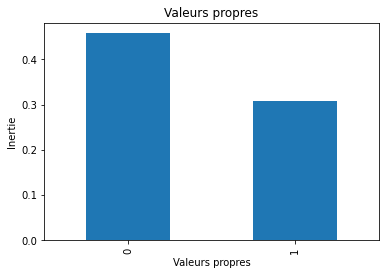

In [20]:
val_propre3.head(10)['val_propre'].plot(kind='bar')

plt.xlabel("Valeurs propres")
plt.ylabel("Inertie")
plt.title("Valeurs propres")

plt.savefig("Valeurs propres_RL.png")
plt.show() 

In [21]:
variable = variable.rename(columns = {0:'population',
                             1:'pop_blanche',
                             2:'nondiplomés',
                             3:'minoritaire',
                             4:'diplomés',
                             5:'revenu_faible',
                             6: 'revenu_eleve'})

variable = variable.rename(index = {0:'Richesse-Réussite',
                            1 : 'Diversité-Population'})


#Enregistrer en format CSV
variable.to_csv('var_acp_RL.csv',header=True)


variable.T

,Richesse-Réussite,Diversité-Population
population,-0.076345,0.387021
pop_blanche,-0.349588,-0.490471
nondiplomés,0.453481,0.210733
minoritaire,0.362174,0.487672
diplomés,-0.403067,0.259571
revenu_faible,0.442092,-0.329024
revenu_eleve,-0.420994,0.389598


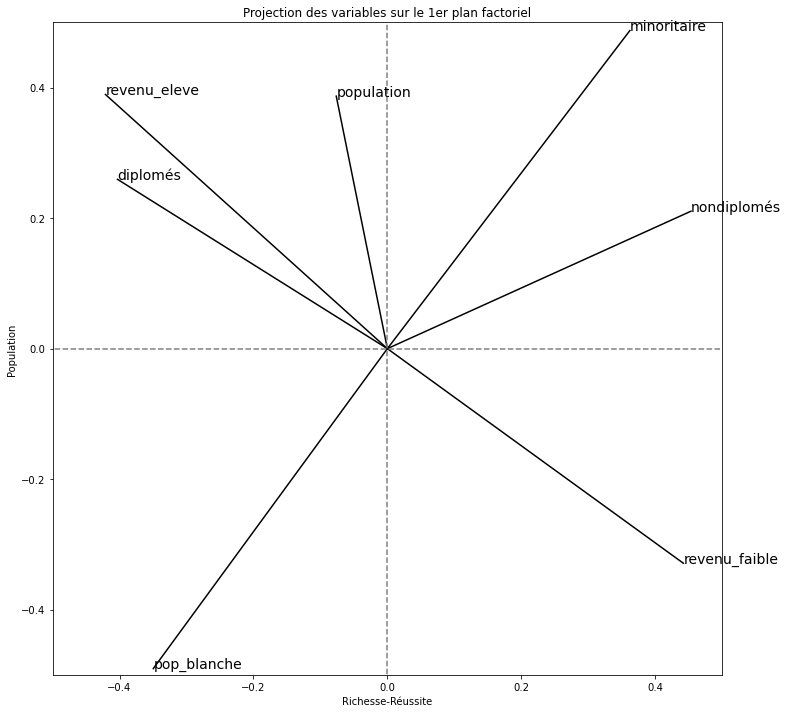

In [22]:
#Cercle des corrélations 

plt.figure(figsize = (12,12))


#Un cercle des corrélation plus simplifiés

for i, (x,y) in enumerate(zip(pcs_train[0,:], pcs_train[1,:])):
    
    plt.plot([0,x],[0,y],color='k') # Afficher un segment d'origine
    
    plt.text(x,y,acp_usa.columns[i],fontsize='14') #Affciher les noms
    
    
    
    
plt.plot([-1,1],[0,0], color = 'grey', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-1,1], color = 'grey', ls='--')#Afficher une ligne verticale

plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

plt.ylabel('Population')
plt.xlabel('Richesse-Réussite')


plt.title('Projection des variables sur le 1er plan factoriel')

plt.savefig("PremierPlanFactoriel_indRL.png")

#### Projection des individus

In [23]:
#Une projection des individus sur les composantes principales

X_projected = pca_train.transform(X_scaled)


individu =pd.DataFrame(X_projected)
individu = individu.rename(columns =  {0:'Richesse-Réussite',
                            1 : 'Diversité-Population'})

cbssa = pd.DataFrame(usa.cbssa)

pol = pd.DataFrame(usa.Candidat)
pol = pol.reset_index()

individu = pd.concat([individu, pol], axis = 1)
individu = pd.concat([individu, cbssa], axis = 1)
individu = individu.set_index(['cbssa'])


individu.to_csv('ind_acp_RL.csv')

individu.head(15)

,Richesse-Réussite,Diversité-Population,index,Candidat
cbssa,,,,
10100,-1.295924,-0.735671,0,Trump
10140,-0.059090,-0.775373,1,Trump
10180,0.528174,0.259837,2,Trump
10220,0.165414,-0.736399,3,Trump
10300,-0.908991,-0.609586,4,Trump
10420,-1.282962,0.091354,5,Clinton
10460,1.562972,0.481215,6,Trump
10500,2.341295,0.810030,7,Clinton
10540,-0.992726,-0.667248,8,Trump


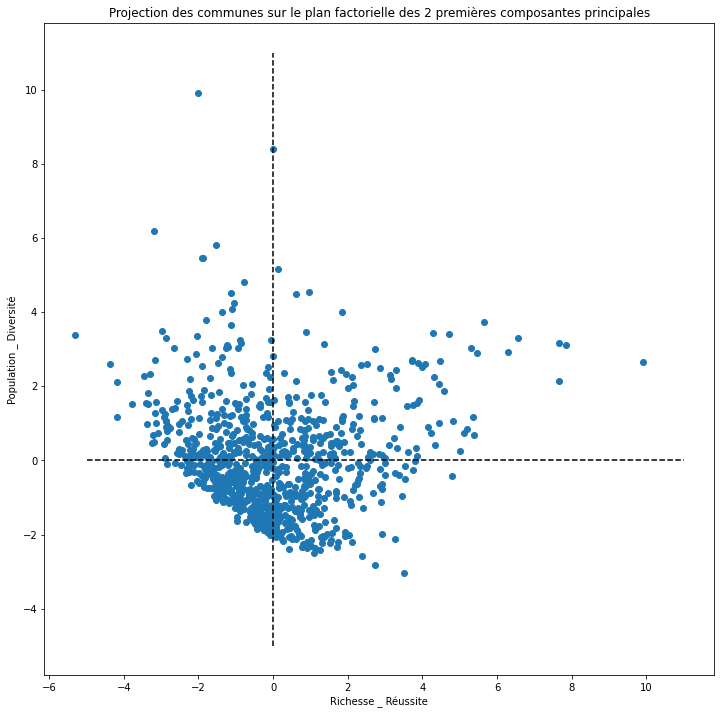

In [24]:
plt.figure(figsize=(12,12))

plt.scatter(X_projected[:,0],X_projected[:,1])

    
plt.plot([-5,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-5,11], color = 'black', ls='--')#Afficher une ligne verticale    
    

plt.ylabel('Population _ Diversité')
plt.xlabel('Richesse _ Réussite')
    
plt.title("Projection des communes sur le plan factorielle des 2 premières composantes principales")    
plt.savefig("IndividusPlan_RL.png") 

On a réussite à réduire l'information avec 2 variables et de présenter nos communes dans un plan factoriel avec l'aide de l'ACP

#### Comparaison avec les candidats

In [25]:
#Divisée par les candidats

acp_trump = individu[individu['Candidat'] == 'Trump']
acp_clinton = individu[individu['Candidat'] == 'Clinton']


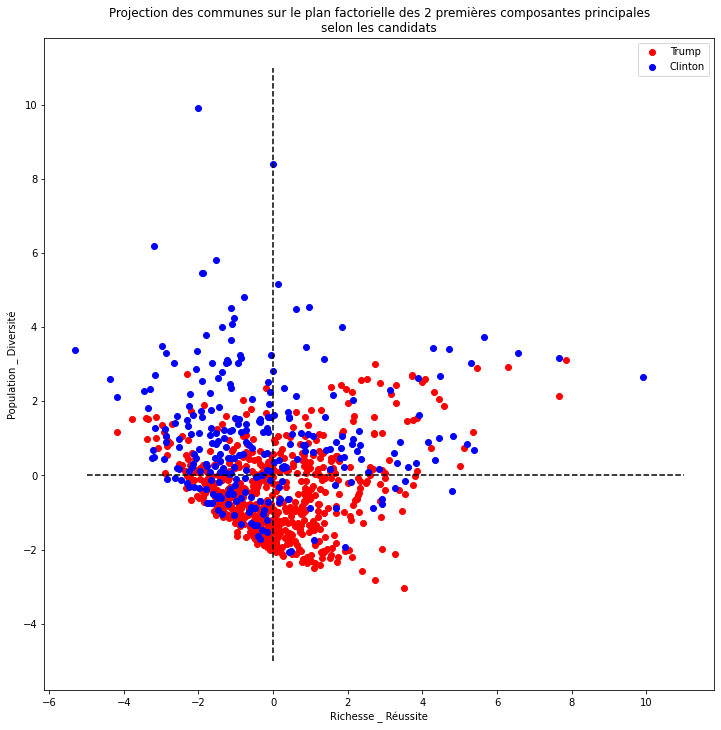

In [26]:
plt.figure(figsize=(12,12))

plt.scatter(acp_trump['Richesse-Réussite'],acp_trump['Diversité-Population'],c= 'red',label='Trump')
plt.scatter(acp_clinton['Richesse-Réussite'],acp_clinton['Diversité-Population'],c= 'blue',label='Clinton')

plt.legend()

    
plt.plot([-5,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-5,11], color = 'black', ls='--')#Afficher une ligne verticale    
    

plt.ylabel('Population _ Diversité')
plt.xlabel('Richesse _ Réussite')
    
plt.title("Projection des communes sur le plan factorielle des 2 premières composantes principales\nselon les candidats")    
plt.savefig("IndividusPlan_Candidat_RL.png") 

# 3 - Validation croisée 

In [27]:
X_projected_T = X_projected

In [28]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score 


In [29]:
individu

,Richesse-Réussite,Diversité-Population,index,Candidat
cbssa,,,,
10100,-1.295924,-0.735671,0,Trump
10140,-0.059090,-0.775373,1,Trump
10180,0.528174,0.259837,2,Trump
10220,0.165414,-0.736399,3,Trump
10300,-0.908991,-0.609586,4,Trump
...,...,...,...,...
49660,0.046341,-0.967966,912,Trump
49700,0.857947,1.566782,913,Trump
49740,3.292745,1.941875,914,Trump


In [30]:
#On prends les valeurs quantitatives
X = individu[individu.columns[:2]]

individu = individu.replace('Trump',1)
individu = individu.replace('Clinton',0)

#On prend les valeurs qualitative
y = individu[['Candidat']]

In [31]:
y

,Candidat
cbssa,
10100,1
10140,1
10180,1
10220,1
10300,1
...,...
49660,1
49700,1
49740,1


#### Jeux d'entrainement et de test

In [32]:
#Création d'un jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [33]:
### Fusion du jeux d'entrainement 

usa_train = pd.concat([X_train, y_train], axis = 1)

usa_train = usa_train.reset_index(['cbssa'])

usa_train = usa_train.replace('Trump',1)
usa_train = usa_train.replace('Clinton',0)


usa_train = usa_train.set_index(['cbssa'])


usa_train

,Richesse-Réussite,Diversité-Population,Candidat
cbssa,,,
37860,-0.796662,0.496878,1
15380,-1.167331,0.460639,0
38420,-0.776168,-1.298908,1
14700,-0.061016,-1.755788,1
20820,-1.551970,-0.768044,1
...,...,...,...
43300,-0.370640,-0.181753,1
13180,-1.364785,-0.459577,1
49380,1.328760,0.594784,1


In [34]:
### Fusion du jeux de test

usa_test = pd.concat([X_test, y_test], axis = 1)

usa_test = usa_test.reset_index(['cbssa'])

usa_test = usa_test.replace('Trump',1)
usa_test = usa_test.replace('Clinton',0)


usa_test = usa_test.set_index(['cbssa'])

usa_test

,Richesse-Réussite,Diversité-Population,Candidat
cbssa,,,
39980,0.427110,-1.636065,1
32740,0.071228,-1.846286,1
44100,-2.084903,0.440638,1
45660,-0.245159,-1.577829,1
26090,-1.324425,-0.504544,1
...,...,...,...
48460,1.096987,-2.498131,1
43060,0.010620,-0.964807,1
27420,-0.867408,-0.868458,1


In [35]:
print(f'Notre jeux d\'entrainement contient {usa_train.shape[0]} lignes et notre jeux de test contient {usa_test.shape[0]} lignes.')

Notre jeux d'entrainement contient 733 lignes et notre jeux de test contient 184 lignes.


# 4 - Régression logistique

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

In [37]:
classifier = LogisticRegression(random_state=0)
classifier

LogisticRegression(random_state=0)

In [38]:
classifier.fit(X_train,y_train)

C:\Users\Sofiane\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [39]:
# Faire une prédiction

y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
classifier.score(X_test,y_test)

0.7717391304347826

In [41]:
modele_regLog = LogisticRegression(random_state = 1, solver = 'newton-cg', multi_class = 'ovr', class_weight='balanced')
modele_regLog.fit(X_train,y_train)
precision = modele_regLog.score(X_test,y_test)
print('Accuracy score :', round(precision*100, 2))

Accuracy score : 70.11


C:\Users\Sofiane\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Représentation graphique

In [42]:
len(y_train['Candidat'])

733

In [43]:
X_set = X_train.values


y_train = y_train.replace('Trump',1)
y_train = y_train.replace('Clinton',0)


y_set = y_train.Candidat.values

In [44]:
y_set

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [45]:
X_set

array([[-0.79666218,  0.49687818],
       [-1.16733117,  0.46063909],
       [-0.77616812, -1.29890829],
       ...,
       [ 1.32875987,  0.59478395],
       [-1.62440917, -0.75389512],
       [-0.53479036, -1.63706128]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


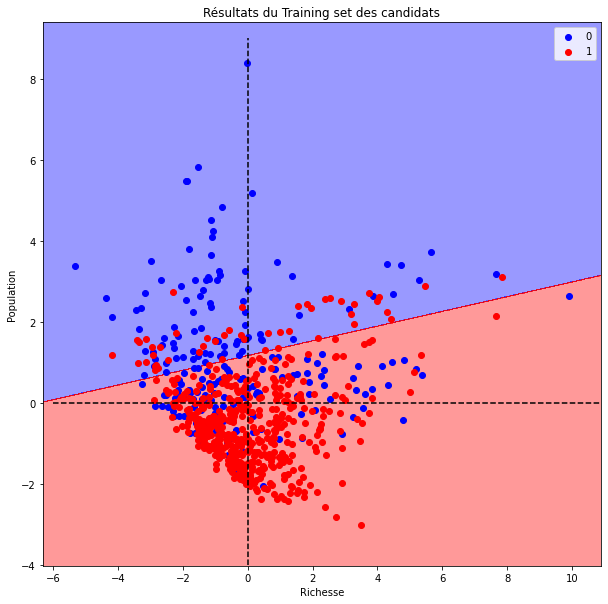

In [46]:
plt.figure(figsize=(10,10))

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('blue', 'red')))

    
plt.plot([-6,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-4,9], color = 'black', ls='--')#Afficher une ligne verticale    
 


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
    
plt.title('Résultats du Training set des candidats')
plt.xlabel('Richesse')
plt.ylabel('Population')

plt.legend()

plt.savefig("Graphe de RL.png")


plt.show()

In [47]:
X1

array([[-6.31433275, -6.30433275, -6.29433275, ..., 10.87566725,
        10.88566725, 10.89566725],
       [-6.31433275, -6.30433275, -6.29433275, ..., 10.87566725,
        10.88566725, 10.89566725],
       [-6.31433275, -6.30433275, -6.29433275, ..., 10.87566725,
        10.88566725, 10.89566725],
       ...,
       [-6.31433275, -6.30433275, -6.29433275, ..., 10.87566725,
        10.88566725, 10.89566725],
       [-6.31433275, -6.30433275, -6.29433275, ..., 10.87566725,
        10.88566725, 10.89566725],
       [-6.31433275, -6.30433275, -6.29433275, ..., 10.87566725,
        10.88566725, 10.89566725]])

In [48]:
X2

array([[-4.02610645, -4.02610645, -4.02610645, ..., -4.02610645,
        -4.02610645, -4.02610645],
       [-4.01610645, -4.01610645, -4.01610645, ..., -4.01610645,
        -4.01610645, -4.01610645],
       [-4.00610645, -4.00610645, -4.00610645, ..., -4.00610645,
        -4.00610645, -4.00610645],
       ...,
       [ 9.37389355,  9.37389355,  9.37389355, ...,  9.37389355,
         9.37389355,  9.37389355],
       [ 9.38389355,  9.38389355,  9.38389355, ...,  9.38389355,
         9.38389355,  9.38389355],
       [ 9.39389355,  9.39389355,  9.39389355, ...,  9.39389355,
         9.39389355,  9.39389355]])

In [49]:
pd.DataFrame(X2)

,0,1,2,3,4,5,6,7,8,9,...,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721
0,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,...,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106,-4.026106
1,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,...,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106,-4.016106
2,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,...,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106,-4.006106
3,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,...,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106,-3.996106
4,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,...,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106,-3.986106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,...,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894,9.353894
1339,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,...,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894,9.363894
1340,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,...,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894,9.373894
1341,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,...,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894,9.383894


### Matrice de confusion 

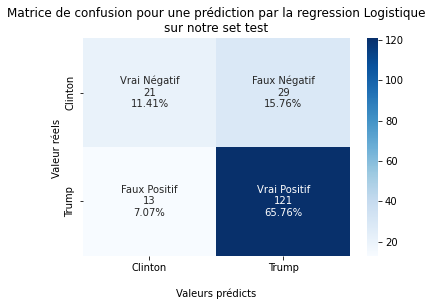

In [50]:
#Matrice de confusion
cm = confusion_matrix(y_test,y_pred)

#
group_names = ['Vrai Négatif','Faux Négatif','Faux Positif','Vrai Positif']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Matrice de confusion pour une prédiction par la regression Logistique\nsur notre set test')
ax.set_xlabel('\nValeurs prédicts')
ax.set_ylabel('Valeur réels ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Clinton','Trump'])
ax.yaxis.set_ticklabels(['Clinton','Trump'])

plt.savefig("Matrice de confusion.png")

## Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        50
           1       0.81      0.90      0.85       134

    accuracy                           0.77       184
   macro avg       0.71      0.66      0.68       184
weighted avg       0.76      0.77      0.76       184



### 4-3 Autres jeux de test/entrainement

In [52]:
#Création d'un jeu d'entrainement et de test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

#Jeux de prédiction du test
y_pred1 = classifier.predict(X_test1)


print(f' Le score du 1er jeux de validationc est de {round(classifier.score(X_test1,y_test1),2)} ')


print('On a la matrice de confusion suivant : ')
print(confusion_matrix(y_test1,y_pred1))


print(classification_report(y_test1,y_pred1))

 Le score du 1er jeux de validationc est de 0.77 
On a la matrice de confusion suivant : 
[[ 21  29]
 [ 13 121]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        50
           1       0.81      0.90      0.85       134

    accuracy                           0.77       184
   macro avg       0.71      0.66      0.68       184
weighted avg       0.76      0.77      0.76       184



In [53]:
#Création d'un jeu d'entrainement et de test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=2)

#Jeux de prédiction du test
y_pred2 = classifier.predict(X_test2)


print(f' Le score du 1er jeux de validationc est de {round(classifier.score(X_test2,y_test2),2)} ')


print('On a la matrice de confusion suivant : ')
print(confusion_matrix(y_test2,y_pred2))


print(classification_report(y_test2,y_pred2))

 Le score du 1er jeux de validationc est de 0.76 
On a la matrice de confusion suivant : 
[[ 19  33]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.63      0.37      0.46        52
           1       0.79      0.92      0.85       132

    accuracy                           0.76       184
   macro avg       0.71      0.64      0.65       184
weighted avg       0.74      0.76      0.74       184



### Courbe de ROC

In [54]:
from sklearn.metrics import roc_curve

In [55]:

actual = y_test[['Candidat']]

actual = actual.reset_index(['cbssa'])

actual = actual.replace('Trump',1)
actual = actual.replace('Clinton',0)


actual = actual.set_index(['cbssa'])

actual 

,Candidat
cbssa,
39980,1
32740,1
44100,1
45660,1
26090,1
...,...
48460,1
43060,1
27420,1


In [56]:
predicted = modele_regLog.predict(X_test)



In [57]:
fpr, tpr, thresholds = roc_curve(actual, predicted)


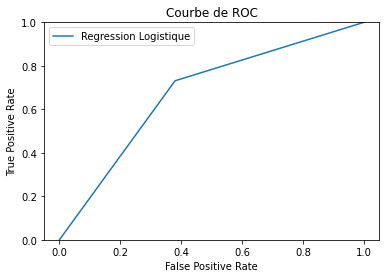

In [59]:

plt.plot(fpr, tpr)


plt.ylim(0,1)

plt.title("Courbe de ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["Regression Logistique"])

plt.savefig('Courbe de ROC.png')
plt.show()

# 5 - Test de données

In [71]:
#Ouverture du fichier
usa_test = pd.read_csv('usa_tests.csv',sep=',', encoding='ISO-8859-1')
usa_test.head()

,cbssa,name,POP10,WHITEp,BLACKp,ASIANp,OTHERp,HISPAp,UNDER18p,F18TO24p,...,MORE65p,NODIPLOMp,F9TO12THp,UNDERGRADp,GRADUATEp,F0TO20p,F20TO40p,F40TO60p,F60TO80p,F80TO100p
0,A1,Sofiane,332434,70,5,5,4,16,24,25,...,8,11,23,23,33,12,21,22,23,26
1,A2,Samir,223,34,22,32,11,12,13,22,...,11,11,18,45,35,13,22,34,26,16
2,A3,Avenor,2424234,31,6,23,44,11,22,34,...,13,13,17,23,3,18,25,23,35,17
3,A4,Aldjia,3232,23,22,32,12,6,32,11,...,9,42,36,6,16,21,24,23,24,17
4,A5,Yougun,21311,33,11,12,32,12,55,23,...,4,22,23,2,34,17,42,25,13,24


In [72]:
#Renommage des colonnes
usa_test = usa_test.rename(columns = {'POP10':'population',
                             'WHITEp':'pop_blanche',
                             'BLACKp':'pop_noir',
                             'HISPAp':'pop_hispanique',
                             'ASIANp':'pop_asiatique',
                             'OTHERp' :'pop_autres',
                             'UNDER18p': 'm18ans',
                             'F18TO24p':'e18_24ans',
                             'F25TO44p':'e25_44ans',
                             'F45TO64p':'e45_64ans',
                             'MORE65p':'p65ans',
                             'NODIPLOMp':'nondiplomés',
                             'F9TO12THp' : 'lycée',
                             'UNDERGRADp':'bac',
                             'GRADUATEp':'université',
                             'F0TO20p':'m20d',
                             'F20TO40p':'e20_40d',
                             'F40TO60p':'e40_60d',
                             'F60TO80p' : 'e60_80d',
                             'F80TO100p' : 'p80d'})



#Modification des variables

usa_test['minoritaire'] = usa_test['pop_noir']+usa_test['pop_hispanique']+usa_test['pop_asiatique'] 
usa_test['jeune'] = usa_test['m18ans'] + usa_test['e18_24ans']
usa_test['senior'] = usa_test['e45_64ans'] + usa_test['p65ans']
usa_test['diplomés'] = usa_test.bac+usa_test['université']
usa_test['revenu_faible'] = usa_test['m20d']+usa_test['e20_40d']
usa_test['revenu_eleve'] = usa_test['e60_80d']+usa_test['p80d']


#Suppression des variables inutiles
usa_test = usa_test.drop(columns=["pop_noir", "pop_asiatique",'pop_autres', 'pop_hispanique','m18ans', 'e18_24ans',
       'e25_44ans', 'e45_64ans', 'p65ans','lycée', 'bac',
       'université', 'm20d', 'e20_40d', 'e40_60d', 'e60_80d', 'p80d'],axis=1)





usa_test.head(5)

,cbssa,name,population,pop_blanche,nondiplomés,minoritaire,jeune,senior,diplomés,revenu_faible,revenu_eleve
0,A1,Sofiane,332434,70,11,26,49,21,56,33,49
1,A2,Samir,223,34,11,66,35,43,80,35,42
2,A3,Avenor,2424234,31,13,40,56,24,26,43,52
3,A4,Aldjia,3232,23,42,60,43,22,22,45,41
4,A5,Yougun,21311,33,22,35,78,27,36,59,37


In [75]:
usa_test.columns

Index(['cbssa', 'name', 'population', 'pop_blanche', 'nondiplomés',
       'minoritaire', 'jeune', 'senior', 'diplomés', 'revenu_faible',
       'revenu_eleve'],
      dtype='object')

In [76]:
#On transforme notre jeux de données en changeant les échelles 
x_predict = sc.transform(usa_test[['population', 'pop_blanche', 'nondiplomés',
       'minoritaire',  'diplomés', 'revenu_faible',
       'revenu_eleve']])

#Procédure de réduction de dimensions
pca_train.fit(x_predict)
pcs_train = pca_train.components_

#Conversion des données en 2D
usa_X = pca_train.transform(x_predict)

In [77]:
usa_X

array([[-2.16934101,  0.4145627 ],
       [-2.36774835,  3.85635436],
       [ 0.44907831, -1.3672072 ],
       [ 6.86490103,  1.11823856],
       [ 2.11490785,  0.05062363],
       [-1.1969694 , -1.63941684],
       [-1.76167878, -0.27568951],
       [-0.52819883, -2.15383028],
       [-0.33674674, -0.99666213],
       [-1.06820409,  0.99302671]])

In [81]:
#On utilise la prédiction par la Regression Logistique

test = classifier.predict(usa_X)
test = list(test)

id = usa_test.name.values
id = list(id)

for i in range(len(test)):
    
    if test[i] == True:
        print(f'La commune de {id[i]} est plutôt républicain.')
    elif test[i] == False:
        print(f'La commune de {id[i]} est plutôt démocrate.')
    else: 
        print(f'Nul')

La commune de Sofiane est plutôt républicain.
La commune de Samir est plutôt démocrate.
La commune de Avenor est plutôt républicain.
La commune de Aldjia est plutôt républicain.
La commune de Yougun est plutôt républicain.
La commune de Terraf est plutôt républicain.
La commune de Adane est plutôt républicain.
La commune de Tizi est plutôt républicain.
La commune de Maklouf est plutôt républicain.
La commune de Larbi est plutôt démocrate.
